In [1]:
import pandas as pd
import numpy as np

# Color images, larger than MNIST, actual objects
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

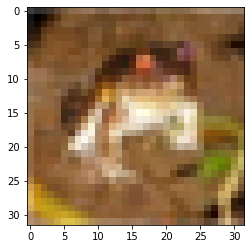

In [5]:
plt.imshow(x_train[0])

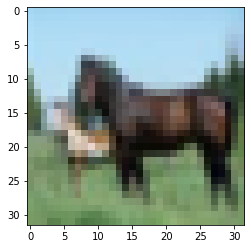

In [6]:
plt.imshow(x_train[12])

In [7]:
x_train[0].shape

(32, 32, 3)

In [8]:
x_train[0].max()

255

In [9]:
# Scale data
x_train = x_train/255
x_test = x_test/255

In [10]:
x_test.shape

(10000, 32, 32, 3)

In [11]:
x_test.max()

1.0

In [12]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [13]:
from tensorflow.keras.utils import to_categorical

In [14]:
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [15]:
y_train[0]

array([6], dtype=uint8)

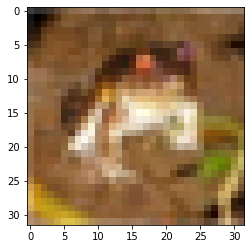

In [16]:
plt.imshow(x_train[0])

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [18]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER - Input must be by shape of data
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

# categorical as we have multiclass problem. 
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [20]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [21]:
model.fit(x_train, y_cat_train, epochs=15,
         validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 15s 307us/sample - loss: 1.5246 - accuracy: 0.4535 - val_loss: 1.4364 - val_accuracy: 0.5084
Epoch 2/15
50000/50000 [==============================] - 15s 294us/sample - loss: 1.1718 - accuracy: 0.5912 - val_loss: 1.4313 - val_accuracy: 0.5139
Epoch 3/15
50000/50000 [==============================] - 15s 296us/sample - loss: 1.0216 - accuracy: 0.6449 - val_loss: 1.1282 - val_accuracy: 0.6057
Epoch 4/15
50000/50000 [==============================] - 15s 296us/sample - loss: 0.9105 - accuracy: 0.6836 - val_loss: 1.0296 - val_accuracy: 0.6522
Epoch 5/15
50000/50000 [==============================] - 16s 311us/sample - loss: 0.8359 - accuracy: 0.7128 - val_loss: 1.0248 - val_accuracy: 0.6687
Epoch 6/15
50000/50000 [==============================] - 15s 294us/sample - loss: 0.7699 - accuracy: 0.7379 - val_loss: 1.1997 - val_accuracy: 0.6329
Epoch 7/15
50000/50000 [====================

In [22]:
metrics = pd.DataFrame(model.history.history)

In [23]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.524612,0.45348,1.436359,0.5084
1,1.171844,0.59120,1.431334,0.5139
2,1.021575,0.64494,1.128229,0.6057
3,0.910466,0.68364,1.029649,0.6522
4,0.835861,0.71276,1.024771,0.6687
5,0.769866,0.73788,1.199733,0.6329
6,0.723117,0.75556,1.001596,0.6751
7,0.688164,0.76728,1.044362,0.6699
8,0.650935,0.78180,1.076571,0.6846


In [24]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

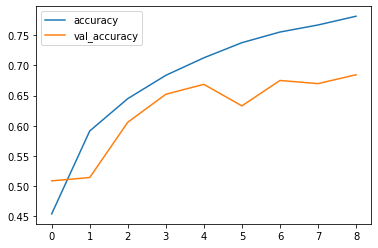

In [25]:
metrics[['accuracy', 'val_accuracy']].plot()

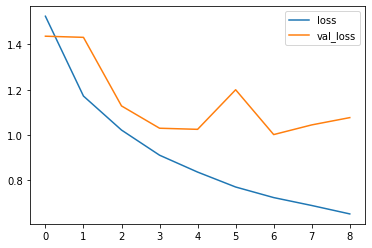

In [26]:
metrics[['loss','val_loss']].plot()

In [27]:
model.evaluate(x_test, y_cat_test, verbose=0)

[1.0765706632614136, 0.6846]

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
predictions = model.predict_classes(x_test)

In [31]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.64      0.72      1000
           1       0.79      0.82      0.81      1000
           2       0.61      0.54      0.57      1000
           3       0.51      0.54      0.52      1000
           4       0.60      0.67      0.63      1000
           5       0.59      0.55      0.57      1000
           6       0.73      0.81      0.77      1000
           7       0.70      0.74      0.72      1000
           8       0.75      0.83      0.78      1000
           9       0.80      0.71      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



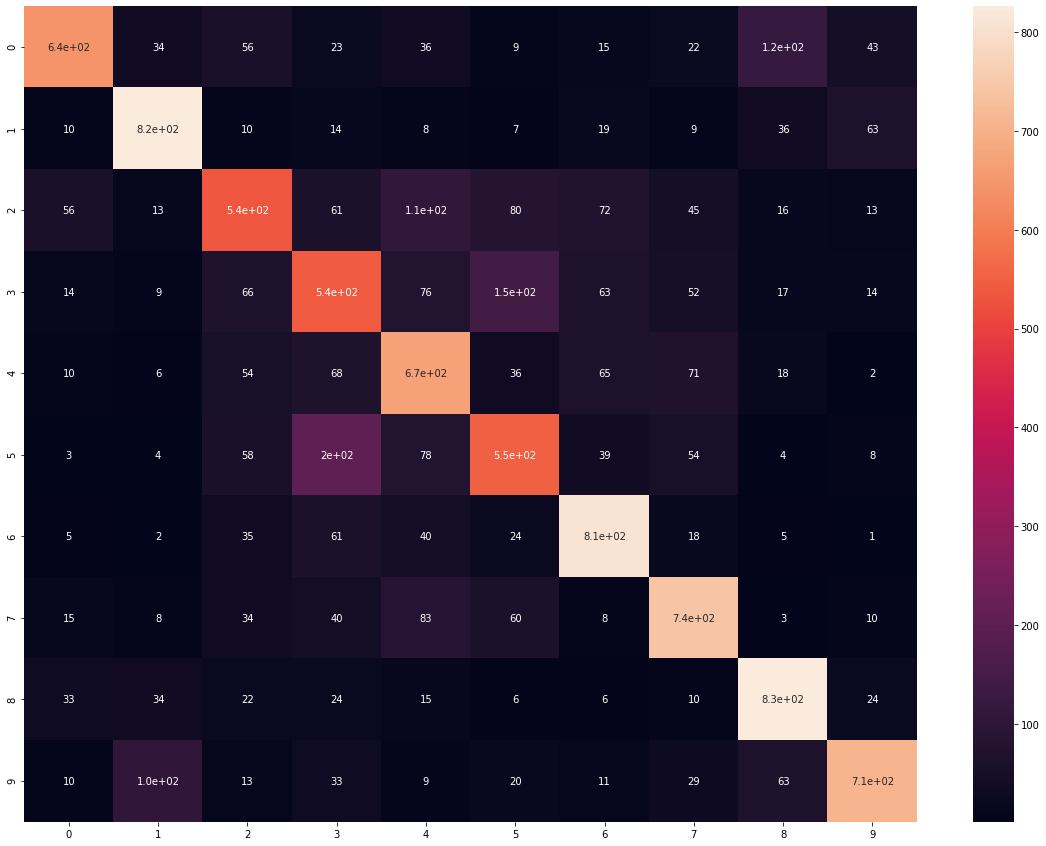

In [35]:
# tends to preform worst on class #5, what is class five?
plt.figure(figsize=(20,15))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

In [36]:
my_image = x_test[0]

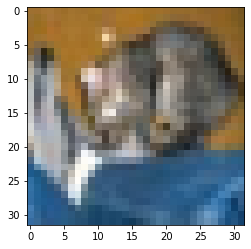

In [37]:
plt.imshow(my_image)

In [38]:
y_test[0]

array([3], dtype=uint8)

In [39]:
model.predict_classes(my_image.reshape(1,32,32,3))

array([3], dtype=int64)